In [1]:
# Created By: Vihan Weeraratne 
# Last Edit: 26/10/30

# A Bucket Model Approach for Estimating Wetland Harvesting Efficiency

# For CIV4212 - Civ Prac

In [3]:
import numpy as np
import csv
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
########################################################################
### Define fixed inputs for the model ###
# daily demand in Litres (using wastewater demand for now, based on Metcalf and Eddy, 2003)
#dailyDemand = 66*1000/30.4
dailyDemand = 450*1000/30.41

# Available area in m2 to collect rainwater from (refer to WaterDetailedCalcs.xlsx)
# Available Area = (Total Area - Roof Area)
yieldArea = ((4.1*10000)-2400)

# Total volume of rainwater tanks (in kL)
#tankCumulativeVolume = [20,40,80,120,160,200,240,280,320,360,400]
tankCumulativeVolume = np.arange(0,5600,500)
tankCumulativeVolume = [1E3*x for x in tankCumulativeVolume]

# Years to test (if historical years are tested)
# Select 3 representative years (wet, dry and average)
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
#years = [2010,2010,2011,2012, 2013, 2014,2015,2016,2017,2018,2019]
#years = [2019]

# Initial tank fill (in L) - use 5% of total volume
tankInitialFill = [0.05*x for x in tankCumulativeVolume]

##########################################################################

In [5]:
### Calculating system reliability based on defined years
def returnReliability(storage):
    counter = 0
    for s in range(len(storage)):
        if (storage[s] > 0):
            counter += 1
        else:
            pass

    reliability = counter/len(storage)*100

    print("The reliability of the suggested storage volume of " + \
        str(tankCumulativeVolume[vol]/1e3)+ " kL "+ " to supply "+ \
        str(round(dailyDemand/1000*30.41,2))+" kL/month"+" on a daily basis is " + \
        str(round(reliability,2)) + "%")

    #print(reliability)
    
    return reliability

In [6]:
def returnET(day):
    if (dfRequired['Month'][day]==1):
        ET = 80
    elif(dfRequired['Month'][day]==2):
        ET = 70
    elif(dfRequired['Month'][day]==3):
        ET = 45
    elif(dfRequired['Month'][day]==4):
        ET = 30
    elif(dfRequired['Month'][day]==5):
        ET = 30
    elif(dfRequired['Month'][day]==6):
        ET = 20            
    elif(dfRequired['Month'][day]==7):
        ET = 20            
    elif(dfRequired['Month'][day]==8):
        ET = 20  
    elif(dfRequired['Month'][day]==9):
        ET = 40           
    elif(dfRequired['Month'][day]==10):
        ET = 75
    elif(dfRequired['Month'][day]==11):
        ET = 90
    elif(dfRequired['Month'][day]==12):
        ET = 80 
        
    return ET
    

In [7]:
### Run the simple bucket model ###
## Read the historical csv and extract the data for the selected year
df = pd.read_csv('IDCJAC0009_086088_1800/IDCJAC0009_086088_1800_Data.csv')

# Extract the required years of data
dfRequired = df[df.Year.isin(years)]
dfRequired.reset_index(drop=True, inplace=True)

# fill empty cells with 0
dfRequired['Rainfall amount (millimetres)'] = dfRequired['Rainfall amount (millimetres)'].fillna(0)

#print(dataSetRequired)


## Use rainfall time series and deduct Evapotranspiration (Annual ET = 600mm)
# Runoff(litres) = A * (rainfall(mm) * 0.5 (efficiency factor of 0.6)
# storage = initialFill - daily demand - (ET*area) + runoff
# monthly ET used from BOM (http://www.bom.gov.au/jsp/ncc/climate_averages/evapotranspiration/index.jsp?maptype=1&period=dec#maps)

reliabilitySeries = np.zeros(len(tankCumulativeVolume))
storageSeries = []

for vol in range(len(tankCumulativeVolume)):
    storage = np.zeros(dfRequired.shape[0])
    storage[0] = tankInitialFill[vol]
    for day in range(dfRequired.shape[0]):
        # use rainfall and ET depending on the day (rainfall) and month (ET)
        rainfall = dfRequired['Rainfall amount (millimetres)'][day]
        ET = returnET(day)*yieldArea/30.42

        runoff = (rainfall) * yieldArea * 0.7
        if runoff < 0:
            runoff = 0

        if (day == 0):
            storage[day] = tankInitialFill[vol] - dailyDemand + runoff - ET

        else:
            storage[day] = storage[day-1] - dailyDemand + runoff - ET

        # set storage to be 0 if below 0
        if(storage[day]<0):
            storage[day] = 0
        
        # set storage at maximum capacity if exceeded
        elif(storage[day]>tankCumulativeVolume[vol]):
            storage[day] = tankCumulativeVolume[vol]
 
    reliabilitySeries[vol] = returnReliability(storage)
    storageSeries.append(storage)
        
#print(len(storage))
print(reliabilitySeries)
    

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


The reliability of the suggested storage volume of 0.0 kL  to supply 450.0 kL/month on a daily basis is 0.0%
The reliability of the suggested storage volume of 500.0 kL  to supply 450.0 kL/month on a daily basis is 55.72%
The reliability of the suggested storage volume of 1000.0 kL  to supply 450.0 kL/month on a daily basis is 63.39%
The reliability of the suggested storage volume of 1500.0 kL  to supply 450.0 kL/month on a daily basis is 67.17%
The reliability of the suggested storage volume of 2000.0 kL  to supply 450.0 kL/month on a daily basis is 68.87%
The reliability of the suggested storage volume of 2500.0 kL  to supply 450.0 kL/month on a daily basis is 69.91%
The reliability of the suggested storage volume of 3000.0 kL  to supply 450.0 kL/month on a daily basis is 70.65%
The reliability of the suggested storage volume of 3500.0 kL  to supply 450.0 kL/month on a daily basis is 71.17%
The reliability of the suggested storage volume of 4000.0 kL  to supply 450.0 kL/month on a da

(3652,)


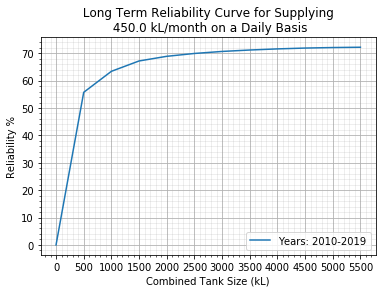

In [8]:
print(storage.shape)
#print(len(storage).shape)
#print(storageSeries)

#plt.plot(tankCumulativeVolume,reliabilitySeries)

# Converting the volume in litres to kilolitres
tankVolume = [x/1000 for x in tankCumulativeVolume]
plt.plot(tankVolume,reliabilitySeries, label = 'Years: '+str(years[0])+'-'+str(years[-1]))
#plt.plot(tankVolume,reliabilitySeries[1], label = 'Dry Year: '+str(years[1]))
#plt.plot(tankVolume,reliabilitySeries[2], label = 'Average Year: '+str(years[2]))

plt.ylabel('Reliability %')
plt.xlabel('Combined Tank Size (kL)')
plt.xticks(tankVolume)
plt.title(' Long Term Reliability Curve for Supplying \n '+str(dailyDemand*30.41/1000)+ ' kL/month on a Daily Basis')
plt.legend()
plt.grid(b=True, which='major')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

#https://coolamontanks.com.au/water-tanks/rainwater-tank-specifications/

# use 2 90 kL tanks and 1 20 kL tank

plt.savefig('LongTermReliabilityCurvesDemand'+str(dailyDemand*30.41/1000)+'kL' + '_Years'+str(years[0])+str(years[-1])+'.png', dpi = 600)

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(0,)


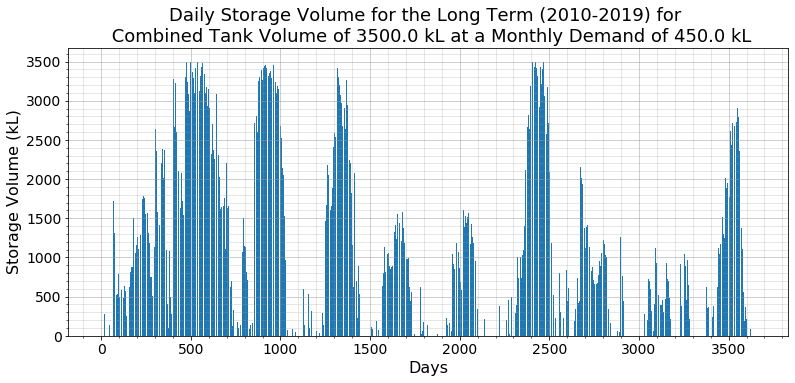

In [9]:
#plt.plot(storageSeries[7])
#############################################
### Storage timeseries for a typical year ###
#############################################
### Choose tank Volume (in litres)
tankVolume = [3500*1e3]

# Initial tank fill (in L) - use 10% of total volume
tankInitialFill = [0.05*x for x in tankVolume]

# pick the average year from the defined years 
typicalYear = years
#typicalYear = [2008]

### Run the simple bucket model ###
## Read the historical csv and extract the data for the selected year
df = pd.read_csv('IDCJAC0009_086088_1800/IDCJAC0009_086088_1800_Data.csv')

# Extract the required years of data
dfRequired = df[df.Year.isin(typicalYear)]
dfRequired.reset_index(drop=True, inplace=True)

# fill empty cells with 0
dfRequired['Rainfall amount (millimetres)'] = dfRequired['Rainfall amount (millimetres)'].fillna(0)

## Use rainfall time series and deduct Evapotranspiration (Annual ET = 600mm)
# Runoff(litres) = A * (rainfall(mm) * 0.5 (efficiency factor of 0.6)
# storage = initialFill - daily demand - (ET*area) + runoff
# monthly ET used from BOM (http://www.bom.gov.au/jsp/ncc/climate_averages/evapotranspiration/index.jsp?maptype=1&period=dec#maps)

storageSeries = []
dailyCollected = []

for vol in range(len(tankVolume)):
    storage = np.zeros(dfRequired.shape[0])
    storage[0] = tankInitialFill[vol]
    for day in range(dfRequired.shape[0]):
        # use rainfall and ET depending on the day (rainfall) and month (ET)
        rainfall = dfRequired['Rainfall amount (millimetres)'][day]
        ET = returnET(day)*yieldArea/30.42

        runoff = (rainfall) * yieldArea * 0.7
        if runoff < 0:
            runoff = 0

        if (day == 0):
            storage[day] = tankInitialFill[vol] - dailyDemand + runoff - ET

        else:
            storage[day] = storage[day-1] - dailyDemand + runoff - ET

        # set storage to be 0 if below 0
        if(storage[day]<0):
            storage[day] = 0
        
        # set storage at maximum capacity if exceeded
        elif(storage[day]>tankVolume[vol]):
            storage[day] = tankVolume[vol]
            
    storageSeries.append(storage)
        
print(np.shape(dailyCollected))

fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(0,len(storageSeries[0]),1),storageSeries[0]/1000)
plt.title('Daily Storage Volume for the Long Term ('+str(typicalYear[0])+ '-' +str(typicalYear[-1])+
          ') for \n Combined Tank Volume of '+str(tankVolume[0]/1000)+' kL'+ ' at a Monthly Demand of '+str(dailyDemand*30.41/1000)+' kL',size=18)
#plt.ylabel('Storage Volume (m\u00b3)')
plt.ylabel('Storage Volume (kL)',size=16)
plt.xlabel('Days',size=16)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.6)
plt.xticks(size=14)
plt.yticks(size=14)

plt.savefig('LongTermDailyStorage_year_'+str(typicalYear[0])+'_'+str(typicalYear[-1])+'tanksize'+str(tankVolume[0]/1000)+'_demand'+str(dailyDemand*30.41/1000)+'.png',dpi=600,bbox_inches='tight')